In [71]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

Data loading

In [72]:
data = pd.read_csv("https://raw.githubusercontent.com/asaitej1/saiteja_data606/main/data/spam.csv ",encoding="ISO-8859-1")

EDA

In [73]:
data

,ï»¿v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ï¿½_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Data contains 5572 rows

In [74]:
train_x, test_x, train_y, test_y = train_test_split(data.iloc[:,1],data.iloc[:,0] ,
                                   test_size=0.2, 
                                   shuffle=True)

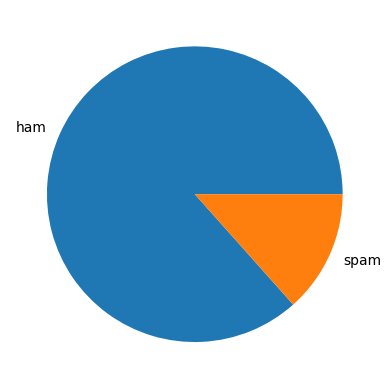

In [75]:
labels = train_y.unique()
plt.pie([train_y.tolist().count(i) for i in labels], labels = labels)
plt.show()

We can observe that the distribution of spam is much less than that of ham. Therefore, we should carefully check the final comparison metrics

<Axes: >

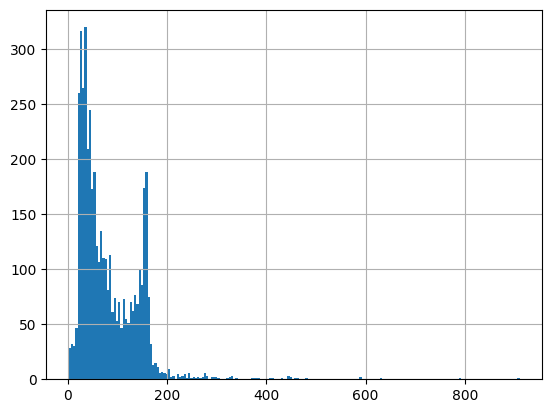

In [76]:
train_x.str.len().hist(bins = 200)

We can oserve that most of the sentences short (less than 100 characters) and almost all of the messages are shorter than 200 chars

<Axes: >

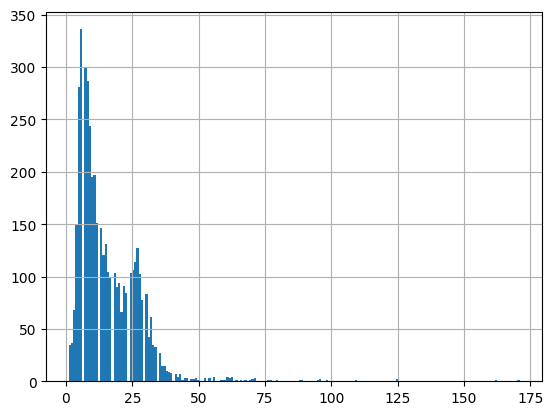

In [77]:
train_x.str.split().map(lambda x: len(x)).hist(bins =200)

We can also oserve that most of the sentences have less than 30 words

In [78]:
wc = {}
for sent in train_x.tolist():
  for word in sent.split(' '):
    wc[word] = wc.get(word, 0) + 1

In [79]:
wc = [[k, wc[k]] for k in wc]

In [80]:
wc.sort(key = lambda x:x[1], reverse = True ) 

In [81]:
wc

[['to', 1720],
 ['you', 1302],
 ['I', 1192],
 ['a', 1047],
 ['the', 929],
 ['and', 683],
 ['in', 633],
 ['is', 614],
 ['i', 603],
 ['u', 545],
 ['for', 510],
 ['my', 508],
 ['', 507],
 ['of', 472],
 ['your', 469],
 ['me', 447],
 ['on', 408],
 ['2', 372],
 ['have', 371],
 ['that', 335],
 ['it', 318],
 ['are', 316],
 ['call', 312],
 ['or', 300],
 ['at', 300],
 ['be', 290],
 ['not', 280],
 ['will', 271],
 ['with', 267],
 ['U', 258],
 ['get', 257],
 ['can', 249],
 ['but', 234],
 ['ur', 231],
 ["I'm", 230],
 ['so', 227],
 ['&lt;#&gt;', 218],
 ['from', 209],
 ['You', 209],
 ['do', 208],
 ['4', 205],
 ['just', 200],
 ['go', 186],
 ['if', 185],
 ['we', 181],
 ['up', 180],
 ['when', 180],
 ['this', 177],
 ['like', 176],
 ['was', 172],
 ['.', 171],
 ['know', 169],
 ['got', 167],
 ['all', 167],
 ['?', 166],
 ['out', 165],
 ['come', 165],
 ['now', 158],
 ['am', 153],
 ['want', 132],
 ['time', 131],
 ['...', 131],
 ['by', 125],
 ['send', 123],
 ['about', 121],
 ['then', 117],
 ['need', 117],
 ['Cal

<BarContainer object of 20 artists>

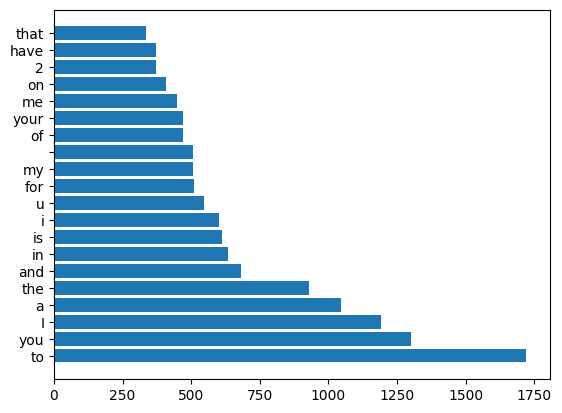

In [82]:
wc = wc[:20]
plt.barh([i[0] for i in wc],[i[1] for i in wc])

Here we can see top 20 freqquent words. As top 2 frequent words dont seem to be useful for classification, we might need tfidf to vectorize the data and use it for training

Preprocessing

Cleaning :  Removal of stop words seems to be a bad idea as the spam messages could have correlation with stop words

Vectorization

In [83]:
#Do imports
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
train_x.tolist()

['Ok lor... But buy wat?',
 'Hey doc pls I want to get nice t shirt for my hubby nice fiting ones my budget is  &lt;#&gt; k help pls I will load d card abi hw,keep me posted luv. 2 mj',
 "I'm gonna rip out my uterus.",
 'HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORRY 4 ME, HOPE U AVA GOODTIME!OLI RANG MELNITE IFINK IT MITE B SORTED,BUT IL EXPLAIN EVERYTHIN ON MON.L8RS.x',
 'Hai priya are you right. What doctor said pa. Where are you.',
 "Lol yes. Our friendship is hanging on a thread cause u won't buy stuff.",
 'SplashMobile: Choose from 1000s of gr8 tones each wk! This is a subscrition service with weekly tones costing 300p. U have one credit - kick back and ENJOY',
 'ou are guaranteed the latest Nokia Phone, a 40GB iPod MP3 player or a ï¿½500 prize! Txt word: COLLECT to No: 83355! IBHltd LdnW15H 150p/Mtmsgrcvd18',
 'U buy newspapers already?',
 'Single line with a big meaning::::: \\Miss anything 4 ur \\"Best Life\\" but',
 'No b4 Thursday',
 'Dont gimme that lip caveboy',
 "I'm thi

In [85]:
#Train vectorizer
sms_vectorizer = TfidfVectorizer()
sms_vectorizer = sms_vectorizer.fit(train_x.tolist()) 

In [86]:
#vectorize the messages
x_vectorized = sms_vectorizer.transform(train_x.tolist()) 

In [87]:
type(x_vectorized)

scipy.sparse._csr.csr_matrix

In [88]:
x_test_vectorized = sms_vectorizer.transform(test_x.tolist()) 

Here re the list of features the tidf has filtered out in sorted format

In [89]:
print(sms_vectorizer.get_feature_names_out())

['00' '000' '000pes' ... '½ûªt' '½ûªve' 'ì¼1']


In [90]:
print(sms_vectorizer.get_stop_words())

None


Training SVM

In [91]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_vectorized, train_y)

SVC()

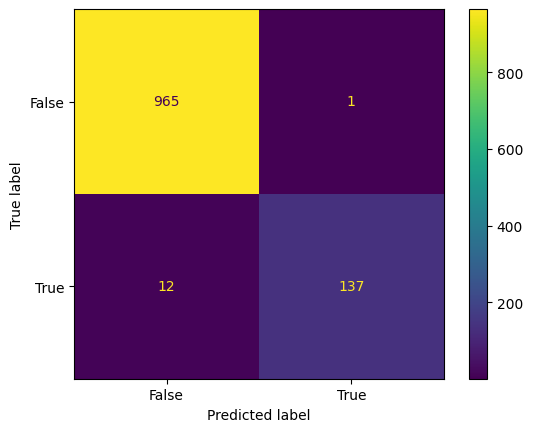

In [92]:
y_pred = svm.predict(x_test_vectorized)
confusion_matrix = metrics.confusion_matrix(test_y,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]).plot()

In [93]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Training Decision tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_vectorized, train_y)


DecisionTreeClassifier()

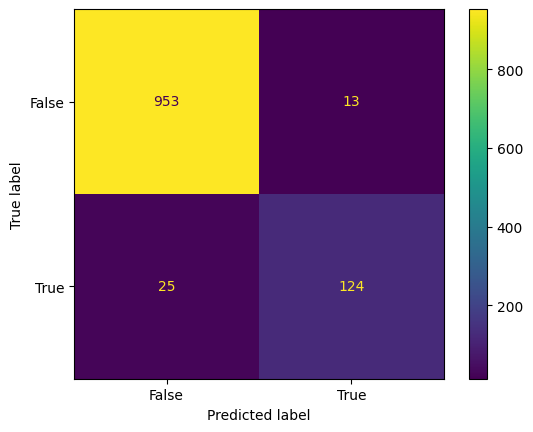

In [95]:
y_pred = tree.predict(x_test_vectorized)
confusion_matrix = metrics.confusion_matrix(test_y,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]).plot()

In [61]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       974
        spam       0.86      0.84      0.85       141

    accuracy                           0.96      1115
   macro avg       0.92      0.91      0.92      1115
weighted avg       0.96      0.96      0.96      1115



Training MLP clasifier

In [62]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(max_iter=300).fit(x_vectorized, train_y)

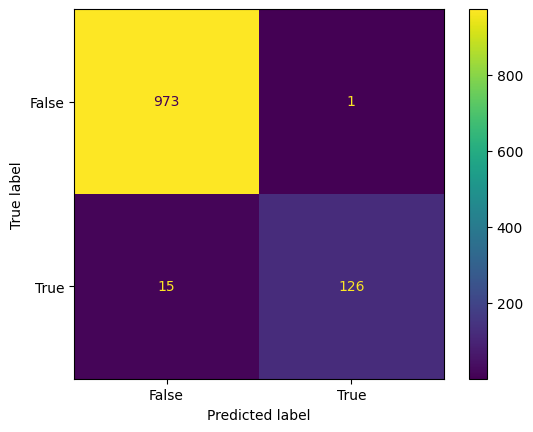

In [63]:
y_pred = MLP_clf.predict(x_test_vectorized)
confusion_matrix = metrics.confusion_matrix(test_y,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]).plot()

In [64]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       974
        spam       0.99      0.89      0.94       141

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Training random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_vectorized, train_y)

RandomForestClassifier(n_estimators=10)

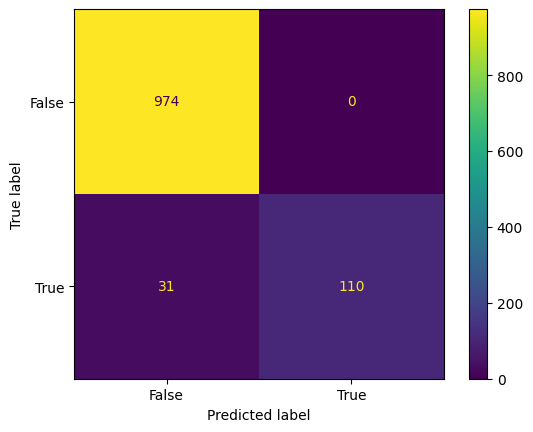

In [66]:
y_pred = forest.predict(x_test_vectorized)
confusion_matrix = metrics.confusion_matrix(test_y,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]).plot()

In [67]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       974
        spam       1.00      0.78      0.88       141

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



Training AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=10)
ada.fit(x_vectorized, train_y)

AdaBoostClassifier(n_estimators=10)

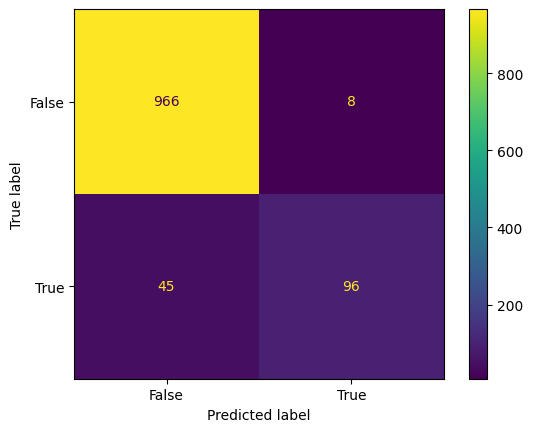

In [69]:
y_pred = ada.predict(x_test_vectorized)
confusion_matrix = metrics.confusion_matrix(test_y,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]).plot()

In [70]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.99      0.97       974
        spam       0.92      0.68      0.78       141

    accuracy                           0.95      1115
   macro avg       0.94      0.84      0.88      1115
weighted avg       0.95      0.95      0.95      1115



From the above results we can observe that Random forest with 10 estimators are working the best 